In [926]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
from IPython.display import HTML
import re

# Introduction
This case study gives the insights of the funding raised by various Indian startups and how growth changed with several factors. The aim of the study is to get a descriptive overview and a relationship pattern of funding and growth of newly launched startups specifically in EdTech domain. Another important point to understand how funding changes with time is an important aspect. Possible area of interests would be – (Funding ecosystem and time relation, cities as a important factor, which industries, important investors). Dataset we are using contains information of funding of startups from January 2015 to May 2020.The amount invested is in USD. Aggregation of data w.r.t cities, investors, funding type etc. is required to get an optimized result. Here we have done major preprocessing of data and overcome problem of missing data and uncertain distributions. Also, Visualizations are done to find the anomalies and mining patterns from data. It seems to be some cities showing some abnormal behavior when it comes to funding.

In [927]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
  color: black !important;
}
</style>

In [928]:
data = pd.read_excel('comp2.xlsx')
df.columns
df=data.drop(['Unnamed: 0'], axis = 1)


Here's a sample view of our dataset, Displaying the first 20 rows:

In [929]:
df.rename(columns={'Amount in USD':'AmountInUSD',
                          'Investors Name':'Investor',
                          'City  Location':'City',
                   'Industry Vertical':'Industry',
                  'InvestmentnType':'Type',
                  'Startup Name':'Name',
                  'Date dd/mm/yyyy':'Date',
                  'Sr No':'S.No'}, 
                 inplace=True)


df.head(20)

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD
0,1,09/01/2020,Byju’s,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000"
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000"
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000"
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000"
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000"


In [930]:
df['Type'].fillna(method='bfill',inplace=True)#backward filling of null values

In [931]:
df.loc[ 192, 'Date'] = '05/07/2018' 
df.loc[2571, 'Date'] = '01/07/2015' 
df.loc[2606, 'Date'] = '10/07/2015'
df.loc[2775, 'Date'] = '12/05/2015' 
df.loc[2776, 'Date'] = '12/05/2015'
df.loc[2831, 'Date'] = '13/04/2015' 
df.loc[3011, 'Date'] = '15/01/2015'
df.loc[3029, 'Date'] = '22/01/2015'
date_expand = df['Date'].str.extract(r'(\d{2})/?(\d{2})/?(\d{4})')
df['Year'] = date_expand[2]
df['Month'] = date_expand[1]
df['NewDate'] = date_expand[0]+'/'+date_expand[1]+'/'+date_expand[2]

In [932]:
df['Date'] = pd.to_datetime(df['Date'])#['Date']

In [979]:
df['City']=df['City'].fillna(value='NotSpecific')
df['Investor']=df['Investor'].fillna(value='Unknown')

In [934]:
df['Industry']=df['Industry'].fillna(value='Other')

In [935]:
df.loc[df['Industry'].isin(["E-Tech", "Education", "EdTech","EduTech", "Edutech","Edtech","Ed-Tech","Online Education Platform"]), 'Industry'] = 'EdTech'
df.loc[df['Industry'].isin(["ECommerce", "E-Commerce", "E-commerce", "Ecommerce"]), 'Industry'] = 'eCommerce'
df.loc[df['Industry'].isin(["Fin-Tech"]), 'Industry'] = 'FinTech'

In [936]:
df.loc[df['Investor'].isin(['Undisclosed investors', 'Undisclosed', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed investors']), 'Investor'] = 'Undisclosed Investors'
df.loc[df['Investor'] == "\\\\xc2\\\\xa0Tiger Global", 'Investor'] = 'Tiger Global'
df.loc[df['Investor'] == "\\\\xc2\\\\xa0IndianIdeas.com", 'Investor'] = 'IndianIdeas'
df.loc[df['Investor'] == "\\\\xc2\\\\xa0IvyCap Ventures, Accel Partners, Dragoneer Investment Group", 'Investor'] = 'IvyCap Ventures, Accel Partners, Dragoneer Investment Group'
df.loc[df['Investor'] == "\\\\xc2\\\\xa0Goldman Sachs", 'Investor'] = 'Goldman Sachs'

In [937]:
df.loc[df['AmountInUSD'].isin(['undisclosed', 'unknown', 'Undisclosed']), 'AmountInUSD'] = 'nan'

df['AmountInUSD'] = df['AmountInUSD'].astype(str)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : re.sub("[^0-9]", "", x))
df.loc[df['AmountInUSD']=='', 'AmountInUSD'] = 0 #'nan' # replace with average of funding provided that months 
df['AmountInUSD'] = df['AmountInUSD'].astype(float)

In [938]:
df.at[2602,"Name"]= "News Inshorts"
df.at[2602,"Industry"]= "News Application"
df.at[2602,"City"]= "Noida"
df.at[2603,"Name"]= "Bluestone"
df.at[2603,"Industry"]= "Online Jewellery"
df.at[2603,"City"]= "Bangalore"
df.at[2608,"Name"]= "Loyalty Rewards"
df.at[2608,"Industry"]= "Premium Rewards"
df.at[2608,"City"]= "Mumbai"
df.at[2610,"Name"]= "Mamagoto"
df.at[2610,"Industry"]= "Restaurant Chain"
df.at[2610,"City"]= "New Delhi"
df.at[2648,"Name"]= "Flipkart"
df.at[748,"Name"]= "Ola Cabs"
df.at[791,"Name"]= "Ola Cabs"
df.at[924,"Name"]= "Ola Cabs"
df.at[2244,"Name"]= "Ola Cabs"

In [939]:
print("Maximum funding to a Startup is : ",df["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startup is :  3900000000.0


In [940]:
top_20 = df.nlargest(20, 'AmountInUSD')
max_funded_amount = top_10['AmountInUSD'].max()
top_funded = top_10[top_10.AmountInUSD == max_funded_amount]
top_startup_name = top_funded.loc[:,'Name']
print(top_startup_name)
print("Most Funded Startup of India is with $" ,top_10['AmountInUSD'].max())

0                       Byju's
30    Furtados School of Music
Name: Name, dtype: object
Most Funded Startup of India is with $ 200000000.0


In [941]:
top_20

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,2019,08,27/08/2019
651,652,2017-11-08,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,2017,08,11/08/2017
2602,2603,2015-09-07,News Inshorts,News Application,NaN,Noida,Tiger Global,Private Equity,2.020000e+09,2015,07,09/07/2015
2608,2609,2015-10-07,Loyalty Rewards,Premium Rewards,NaN,Mumbai,IndianIdeas,Private Equity,2.019350e+09,2015,07,10/07/2015
2603,2604,2015-09-07,Bluestone,Online Jewellery,NaN,Bangalore,"IvyCap Ventures, Accel Partners, Dragoneer Inv...",Private Equity,2.016200e+09,2015,07,09/07/2015
2610,2611,2015-07-13,Mamagoto,Restaurant Chain,NaN,New Delhi,Goldman Sachs,Private Equity,2.010000e+09,2015,07,13/07/2015
83,84,2019-06-06,Pratilipi,Digital Media,E-Books,Bengaluru,Qiming Venture Partners,Series B,1.510950e+09,2019,06,06/06/2019
830,831,2017-05-18,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2017,05,18/05/2017
966,967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,2017,03,21/03/2017
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,2019,11,25/11/2019


In [942]:
df[df['Name']=='Paytm'] 

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,2019,11,25/11/2019
251,252,2018-06-26,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,2018,06,26/06/2018
830,831,2017-05-18,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2017,05,18/05/2017
1493,1494,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,2016,08,30/08/2016
2459,2460,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,2015,09,29/09/2015
2890,2891,2015-03-13,Paytm,Other,NaN,NotSpecific,Ratan Tata,Private Equity,0.000000e+00,2015,03,13/03/2015
2948,2949,2015-05-02,Paytm,Other,NaN,NotSpecific,Ant Financial Services (Alipay),Private Equity,0.000000e+00,2015,02,05/02/2015


In [943]:
funding_count_yr = pd.DataFrame(df['Year'].value_counts())
funding_count_yr.rename(columns={"Year":"Number of Fundings"}, inplace=True)
funding_count_yr

,Number of Fundings
2016,993
2015,936
2017,687
2018,311
2019,115
2020,56


Number of funding per year in decreasing order(Top 10)
 2016    993
2015    936
2017    687
2018    311
2019    115
2020     56
Name: Year, dtype: int64


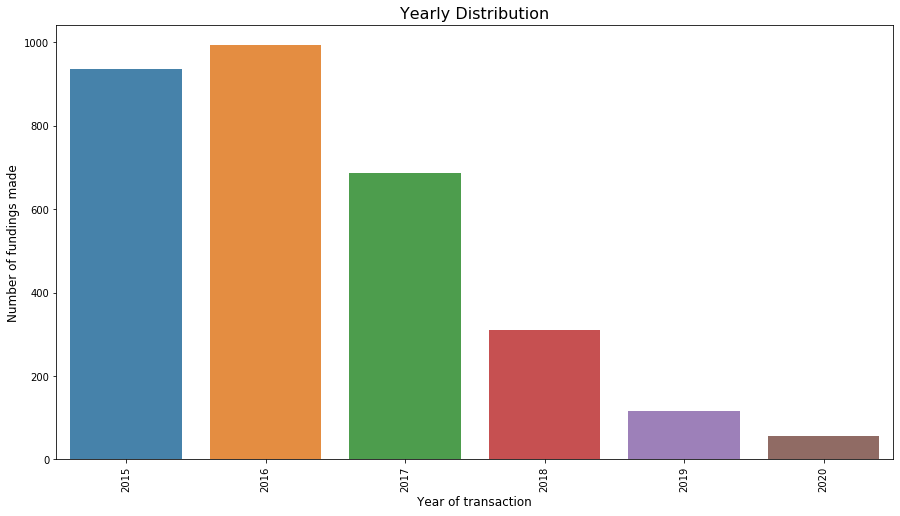

In [944]:
temp = df['Year'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per year in decreasing order(Top 10)\n",temp)
year = df['Year'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year.index, year.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Yearly Distribution", fontsize=16)
plt.show()

In [945]:
funding_total_yr = pd.DataFrame(df.groupby(by=['Year'])['AmountInUSD'].sum())
funding_total_yr.rename(columns={"AmountInUSD":"Total Funding(USD-Bn)"}, inplace=True)
funding_total_yr = funding_total_yr.sort_values(by='Total Funding(USD-Bn)', ascending=False)
funding_total_yr

,Total Funding(USD-Bn)
Year,
2015,1.691302e+10
2019,1.253823e+10
2017,1.042931e+10
2018,6.122368e+09
2016,3.828089e+09
2020,1.255632e+09


In [946]:
fundings_count_city = pd.DataFrame(df['City'].value_counts().sort_values(ascending=False)[:10])
fundings_count_city.rename(columns={'City':'Number of Fundings by City'}, inplace=True)
fundings_count_city.head(10)

,Number of Fundings by City
Bangalore,706
Mumbai,580
New Delhi,430
Gurgaon,288
NotSpecific,180
Bengaluru,148
Pune,108
Hyderabad,101
Chennai,99
Noida,95


Bangalore      706
Mumbai         580
New Delhi      430
Gurgaon        288
NotSpecific    180
Bengaluru      148
Pune           108
Hyderabad      101
Chennai         99
Noida           95
Name: City, dtype: int64


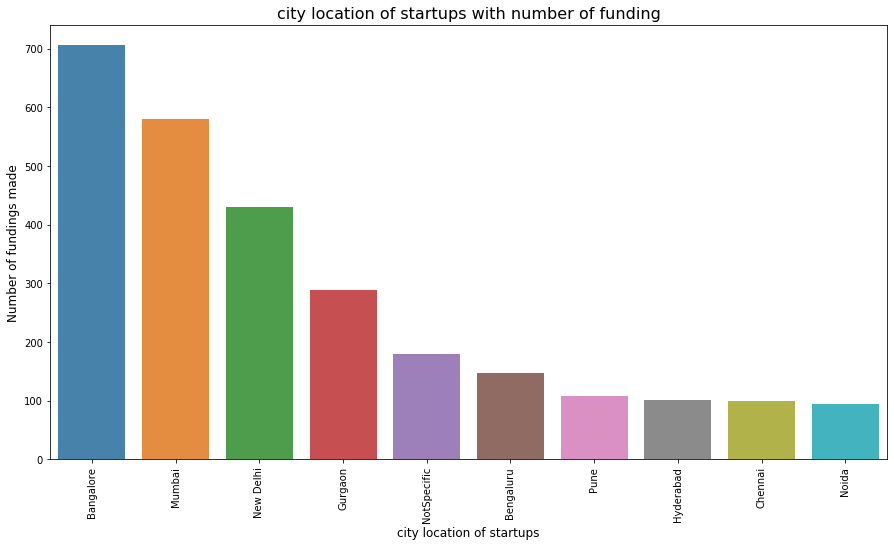

In [947]:
city = df['City'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

In [948]:
fundings_count_industry = pd.DataFrame(df['Industry'].value_counts().sort_values(ascending=False))[:15]
fundings_count_industry.rename(columns={'Industry':'Number of Fundings by Industry'}, inplace=True)
fundings_count_industry.head(10)

,Number of Fundings by Industry
Consumer Internet,941
Technology,478
eCommerce,307
Other,171
Healthcare,71
EdTech,64
Finance,64
Logistics,32
Food & Beverage,23
FinTech,16


Consumer Internet    941
Technology           478
eCommerce            307
Other                171
Healthcare            71
EdTech                64
Finance               64
Logistics             32
Food & Beverage       23
FinTech               16
Name: Industry, dtype: int64


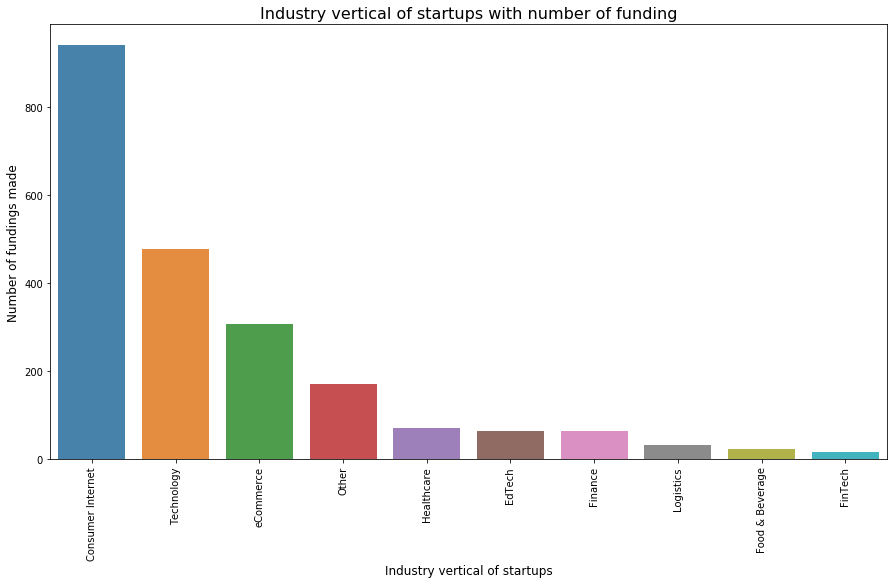

In [949]:
industry = df['Industry'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

In [950]:
funding_count_investor = pd.DataFrame(df['Investor'].value_counts()).sort_values(by='Investor', ascending=False)[:10]
funding_count_investor.rename(columns={'Investor': 'Number of Investments by Investor'}, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed Investors'].index, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed investors'].index, inplace=True)
funding_count_investor.head()

,Number of Investments by Investor
Ratan Tata,25
Indian Angel Network,23
Kalaari Capital,16
Group of Angel Investors,15
Sequoia Capital,15


In [951]:
funding_total_investor = pd.DataFrame(df.groupby(['Investor'])['AmountInUSD'].sum()).sort_values(by="AmountInUSD", ascending=False)[:15]
funding_total_investor.rename(columns={'AmountInUSD':'Funding by Investor(USD-Bn)'}, inplace=True)
funding_total_investor.head()

,Funding by Investor(USD-Bn)
Investor,
Westbridge Capital,3.900000e+09
Softbank,2.500000e+09
Tiger Global,2.130500e+09
Goldman Sachs,2.035000e+09
IndianIdeas,2.019350e+09


In [952]:
funding_count_company = pd.DataFrame(df['Name'].value_counts()).sort_values(by='Name', ascending=False)[:15]
funding_count_company.rename(columns={'Name': 'Number of Investments by Investor'}, inplace=True)
funding_count_company.head(5)

,Number of Investments by Investor
Ola Cabs,12
Swiggy,9
Nykaa,8
OYO,7
Paytm,7


In [953]:
funding_total_company = pd.DataFrame(df.groupby('Name')['AmountInUSD'].sum()).sort_values(by='AmountInUSD', ascending=False)[:15]
funding_total_company.rename(columns={'AmountInUSD': "Total amount Raised by Startup (USD-Bn)"}, inplace=True)
funding_total_company.head(10)

,Total amount Raised by Startup (USD-Bn)
Name,
Flipkart,4.759700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.148950e+09
News Inshorts,2.020000e+09
Loyalty Rewards,2.019350e+09
Bluestone,2.016200e+09
Mamagoto,2.010000e+09
OYO,1.860000e+09
Ola Cabs,1.654200e+09


In [954]:
df1=df[(df['Industry']=='EdTech')]
df1

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
0,1,2020-09-01,Byju’s,EdTech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,01,09/01/2020
19,20,2019-11-13,Sunstone Eduversity Pvt. Ltd,EdTech,Elearning,Gurgaon,"Prime Venture Partners, LetsVenture, PS1 Ventu...",Seed,1500000.0,2019,11,13/11/2019
30,31,2019-11-19,Furtados School of Music,EdTech,Music Education,Tulangan,IAN Fund and DSG Consumer Partners,Funding Round,200000000.0,2019,11,19/11/2019
57,58,2019-08-23,AdmitKard,EdTech,University Admissions,Noida,Growth DNA,Seed Round,1000000.0,2019,08,23/08/2019
67,68,2019-10-07,Byju's,EdTech,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,150000000.0,2019,07,10/07/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
3090,3091,2020-02-04,Camp K-12,EdTech,Education,Gurugram,SAIF Partners and Matrix,Seed,4000000.0,2020,04,02/04/2020
3091,3092,2020-02-04,Lido Learning,EdTech,Education,Mumbai,Picus Capital,Series B,7500000.0,2020,04,02/04/2020
3092,3093,2020-02-03,Lido Learning,EdTech,Education,Mumbai,BAce Capital,Series B,3000000.0,2020,03,02/03/2020
3093,3094,2019-11-04,WhiteHat Jr,EdTech,Coding Skill Showcase & Resume Builder,Mumbai,"Nexus Venture Partners, Omidyar Network",Seed,1200000.0,2019,04,11/04/2019


In [955]:
df1.at[67,"Name"]= "Byju\'s"
df1.at[1356,"Name"]= "Byju\'s"
df1.at[0,"Name"]= "Byju\'s"

In [956]:
df1[df1['Year']=='2020']

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
0,1,2020-09-01,Byju's,EdTech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,01,09/01/2020
3047,3048,2020-01-31,DoubtNut,EdTech,Online Tutoring,Gurugram,Tencent Holdings,Series A,15000000.0,2020,01,31/01/2020
3049,3050,2020-03-02,Embibe,EdTech,AI based learning,Mumbai,Reliance Industries Limited (RIL),Venture Series,12625020.0,2020,02,03/02/2020
3055,3056,2020-05-02,WizKlub,EdTech,Online Tutoring,Bangalore,Incubate Fund India and Insitor Impact Asia Fund,Seed,1000000.0,2020,02,05/02/2020
3060,3061,2020-02-19,Unacademy,EdTech,Online Tutoring,Bangalore,"General Atlantic, Sequoia Capital India, and F...",Series D,110000000.0,2020,02,19/02/2020
3064,3065,2020-03-13,CollegeKhabri,EdTech,Education,Bhopal,Vdiec Global,Angel,0.0,2020,03,13/03/2020
3069,3070,2020-09-04,Vedantu,EdTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000.0,2020,04,09/04/2020
3083,3084,2020-05-05,Classplus,EdTech,"e-learning, education solutions.",Noida,"RTP Global, lume Ventures, Sequoia Capital Ind...",Series A,9000000.0,2020,05,05/05/2020
3087,3088,2020-02-04,Guvi,EdTech,Education,Chennai,CBA Capital,Seed,700000.0,2020,04,02/04/2020
3088,3089,2020-02-04,Vedantu,EdTech,Education,Bangalore,KB Global,Series C,6800000.0,2020,04,02/04/2020


In [957]:
df[df['Name']=='Vedantu']

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
286,287,2018-05-04,Vedantu,EdTech,Interactive Online Tutoring Platform,Bangalore,"Accel Partners, Tiger Global And Others",Private Equity,10000000.0,2018,04,05/04/2018
2767,2768,2015-07-05,Vedantu,EdTech,NaN,Bangalore,"Accel Partners, Tiger Global Management",Private Equity,5000000.0,2015,05,07/05/2015
3069,3070,2020-09-04,Vedantu,EdTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000.0,2020,04,09/04/2020
3088,3089,2020-02-04,Vedantu,EdTech,Education,Bangalore,KB Global,Series C,6800000.0,2020,04,02/04/2020


In [958]:
df[df['Name'] == 'Camp K-12']

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
3090,3091,2020-02-04,Camp K-12,EdTech,Education,Gurugram,SAIF Partners and Matrix,Seed,4000000.0,2020,04,02/04/2020


In [959]:
df[df['Name'] == 'Lido Learning']

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
3091,3092,2020-02-04,Lido Learning,EdTech,Education,Mumbai,Picus Capital,Series B,7500000.0,2020,04,02/04/2020
3092,3093,2020-02-03,Lido Learning,EdTech,Education,Mumbai,BAce Capital,Series B,3000000.0,2020,03,02/03/2020


In [960]:
df[df['Name'] == 'Classplus']

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
3083,3084,2020-05-05,Classplus,EdTech,"e-learning, education solutions.",Noida,"RTP Global, lume Ventures, Sequoia Capital Ind...",Series A,9000000.0,2020,05,05/05/2020


In [961]:
df1[df1['Name'] == 'Byju\'s']

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
0,1,2020-09-01,Byju's,EdTech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,01,09/01/2020
67,68,2019-10-07,Byju's,EdTech,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,150000000.0,2019,07,10/07/2019
1356,1357,2016-09-09,Byju's,EdTech,Online Learning App,Bangalore,"Chan Zuckerberg Initiative, Times Internet Ltd...",Private Equity,50000000.0,2016,09,09/09/2016


In [962]:
df1[df1['Name'] == 'WhiteHat Jr']

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
3093,3094,2019-11-04,WhiteHat Jr,EdTech,Coding Skill Showcase & Resume Builder,Mumbai,"Nexus Venture Partners, Omidyar Network",Seed,1200000.0,2019,04,11/04/2019
3094,3095,2019-11-09,WhiteHat Jr,EdTech,Coding Skill Showcase & Resume Builder,Mumbai,"Nexus Venture Partners, Omidyar Network",Series A,10000000.0,2019,09,11/09/2019


In [963]:
top_10 = df1.nlargest(10, 'AmountInUSD')
max_funded_amount = top_10['AmountInUSD'].max()
top_funded = top_10[top_10.AmountInUSD == max_funded_amount]
top_startup_name = top_funded.loc[:,'Name']
print(top_startup_name.values)
print("Most Funded EdTech Startup of India is with $" ,top_10['AmountInUSD'].max())

["Byju's" 'Furtados School of Music']
Most Funded EdTech Startup of India is with $ 200000000.0


In [964]:
top_10

,S.No,Date,Name,Industry,SubVertical,City,Investor,Type,AmountInUSD,Year,Month,NewDate
0,1,2020-09-01,Byju's,EdTech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,01,09/01/2020
30,31,2019-11-19,Furtados School of Music,EdTech,Music Education,Tulangan,IAN Fund and DSG Consumer Partners,Funding Round,200000000.0,2019,11,19/11/2019
67,68,2019-10-07,Byju's,EdTech,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,150000000.0,2019,07,10/07/2019
3060,3061,2020-02-19,Unacademy,EdTech,Online Tutoring,Bangalore,"General Atlantic, Sequoia Capital India, and F...",Series D,110000000.0,2020,02,19/02/2020
1356,1357,2016-09-09,Byju's,EdTech,Online Learning App,Bangalore,"Chan Zuckerberg Initiative, Times Internet Ltd...",Private Equity,50000000.0,2016,09,09/09/2016
3047,3048,2020-01-31,DoubtNut,EdTech,Online Tutoring,Gurugram,Tencent Holdings,Series A,15000000.0,2020,01,31/01/2020
369,370,2018-02-13,IMAX Program,EdTech,Individualised Progressive Learning Program,Bengaluru,"Michael & Susan Dell Foundation, LGT Impact Ve...",Private Equity,13500000.0,2018,02,13/02/2018
3049,3050,2020-03-02,Embibe,EdTech,AI based learning,Mumbai,Reliance Industries Limited (RIL),Venture Series,12625020.0,2020,02,03/02/2020
3069,3070,2020-09-04,Vedantu,EdTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000.0,2020,04,09/04/2020
286,287,2018-05-04,Vedantu,EdTech,Interactive Online Tutoring Platform,Bangalore,"Accel Partners, Tiger Global And Others",Private Equity,10000000.0,2018,04,05/04/2018


In [965]:
funding_count_yr = pd.DataFrame(df1['Year'].value_counts())
funding_count_yr.rename(columns={"Year":"Number of Fundings in EdTech"}, inplace=True)
funding_count_yr

,Number of Fundings in EdTech
2016,19
2020,14
2018,14
2019,9
2015,7
2017,1


Number of funding per year in decreasing order(Top 10)
 2016    19
2018    14
2020    14
2019     9
2015     7
2017     1
Name: Year, dtype: int64


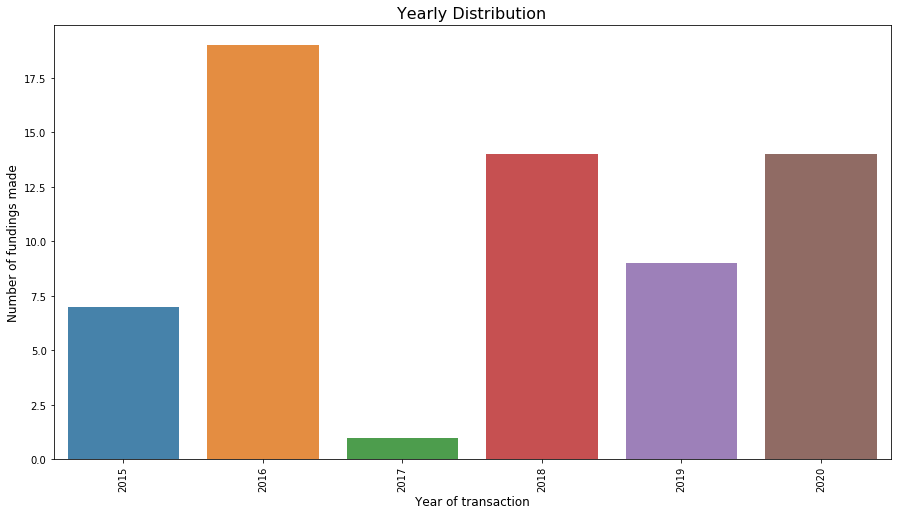

In [966]:
temp = df1['Year'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per year in decreasing order(Top 10)\n",temp)
year = df1['Year'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year.index, year.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Yearly Distribution", fontsize=16)
plt.show()

In [967]:
funding_total_yr = pd.DataFrame(df1.groupby(by=['Year'])['AmountInUSD'].sum())
funding_total_yr.rename(columns={"AmountInUSD":"Total Funding(USD-Bn)"}, inplace=True)
funding_total_yr = funding_total_yr.sort_values(by='Total Funding(USD-Bn)', ascending=False)
funding_total_yr

,Total Funding(USD-Bn)
Year,
2020,382585020.0
2019,370647425.0
2016,82565000.0
2018,42126640.0
2015,17300000.0
2017,8200000.0


In [968]:
fundings_count_city = pd.DataFrame(df1['City'].value_counts().sort_values(ascending=False)[:10])
fundings_count_city.rename(columns={'City':'Number of Fundings by City'}, inplace=True)
fundings_count_city.head(10)

,Number of Fundings by City
Mumbai,17
Bangalore,10
Bengaluru,8
New Delhi,5
Noida,5
Chennai,3
Pune,2
Bhopal,2
Delhi,2
Gurgaon,2


Description count of Location
Mumbai       17
Bangalore    10
Bengaluru     8
New Delhi     5
Noida         5
Name: City, dtype: int64


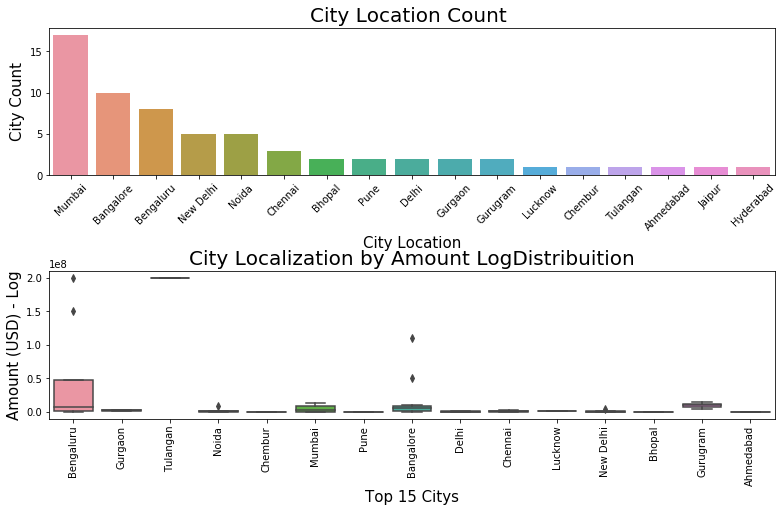

In [969]:
location = df1['City'].value_counts()
print("Description count of Location")
print(location[:5])

plt.figure(figsize=(13,7))

plt.subplot(211)
sns.barplot(x=location.index[:20], y=location.values[:20])
plt.xticks(rotation=45)
plt.xlabel('City Location', fontsize=15)
plt.ylabel('City Count', fontsize=15)
plt.title("City Location Count ", fontsize=20)

plt.subplot(212)
g = sns.boxplot(x='City', y="AmountInUSD",
                data=df1[df1.City.isin(location[:15].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("City Localization by Amount LogDistribuition", fontsize=20)
g.set_xlabel("Top 15 Citys", fontsize=15)
g.set_ylabel("Amount (USD) - Log", fontsize=15)

plt.subplots_adjust(hspace = 0.65,top = 0.9)

plt.show()

In [970]:
funding_count_investor = pd.DataFrame(df1['Investor'].value_counts()).sort_values(by='Investor', ascending=False)[:10]
funding_count_investor.rename(columns={'Investor': 'Number of Investments by Investor'}, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed Investors'].index, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed investors'].index, inplace=True)
funding_count_investor.head()

,Number of Investments by Investor
"Nexus Venture Partners, Omidyar Network",2
"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",1
Bertelsmann India,1
"RTP Global, lume Ventures, Sequoia Capital India's Surge, Spiral Ventures, and Strive.",1
Michael & Susan Dell Foundation,1


In [971]:
funding_total_investor = pd.DataFrame(df1.groupby(['Investor'])['AmountInUSD'].sum()).sort_values(by="AmountInUSD", ascending=False)[:15]
funding_total_investor.rename(columns={'AmountInUSD':'Total Funding by Investor(USD-Bn)'}, inplace=True)
funding_total_investor.head()

,Total Funding by Investor(USD-Bn)
Investor,
Tiger Global Management,200000000.0
IAN Fund and DSG Consumer Partners,200000000.0
Qatar Investment Authority,150000000.0
"General Atlantic, Sequoia Capital India, and Facebook",110000000.0
"Chan Zuckerberg Initiative, Times Internet Ltd, Sequoia Capital, Sofina, Lightspeed Ventures",50000000.0


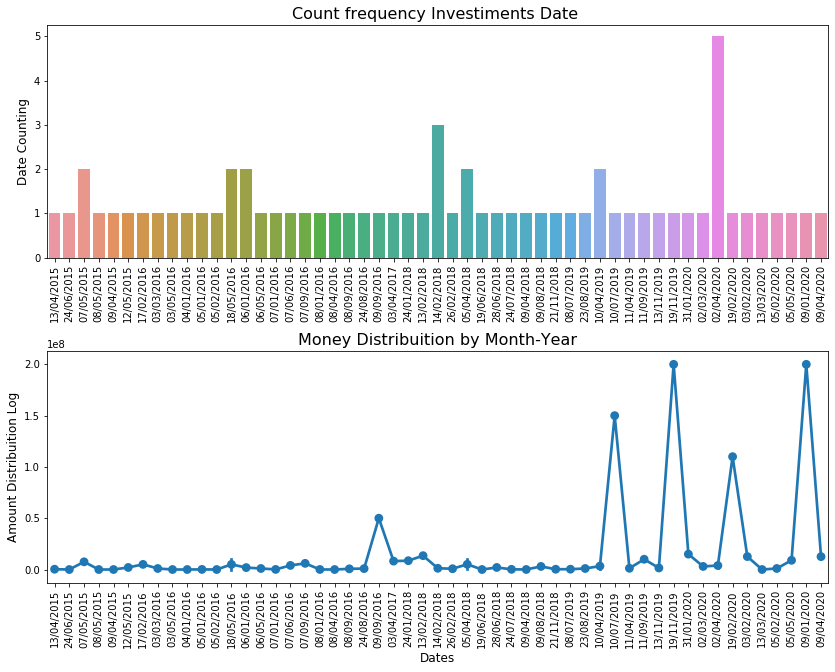

In [972]:
df2 = df1.sort_values(by="Date")
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x='NewDate', data=df2)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=12)
plt.ylabel('Date Counting', fontsize=12)
plt.title("Count frequency Investiments Date ", fontsize=16)

plt.subplot(212)
sns.pointplot(x='NewDate', y='AmountInUSD', data=df2)
plt.xticks(rotation=90)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Amount Distribuition Log', fontsize=12)
plt.title("Money Distribuition by Month-Year", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [973]:
funding_total_company = pd.DataFrame(df1.groupby('Name')['AmountInUSD'].sum()).sort_values(by='AmountInUSD', ascending=False)[:15]
funding_total_company.rename(columns={'AmountInUSD': "Total amount Raised by Startup (USD-Bn)"}, inplace=True)
funding_total_company.head()

,Total amount Raised by Startup (USD-Bn)
Name,
Byju's,400000000.0
Furtados School of Music,200000000.0
Unacademy,110307000.0
Vedantu,34360000.0
Toppr,16420820.0


In [974]:
funding_count_company = pd.DataFrame(df1['Name'].value_counts()).sort_values(by='Name', ascending=False)[:15]
funding_count_company.rename(columns={'Name': 'Number of Investments by Investor'}, inplace=True)
funding_count_company.head()

,Number of Investments by Investor
Vedantu,4
Toppr,3
Byju's,3
WhiteHat Jr,2
Unacademy,2


Private Equity                 21
Seed Funding                   13
Seed                            6
Seed/ Angel Funding             5
Series A                        3
Private Equity Round            2
Series B                        2
Seed / Angel Funding            2
Series C                        1
Debt and Preference capital     1
Structured Debt                 1
Funding Round                   1
Series C1                       1
Venture Series                  1
Angel Round                     1
Seed Round                      1
Angel                           1
Series D                        1
Name: Type, dtype: int64


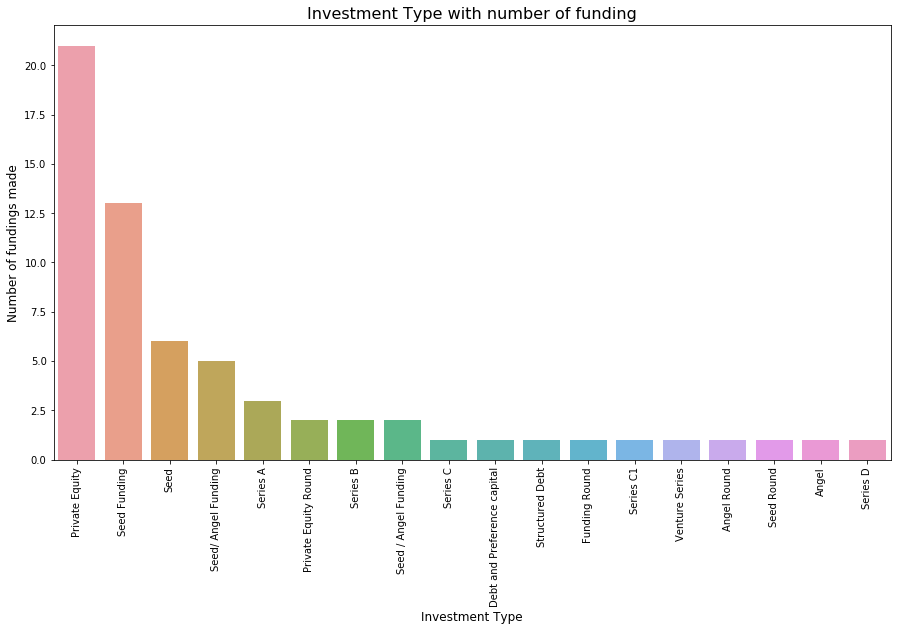

In [975]:
investment = df1['Type'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

In [976]:
temp = df1["Type"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

In [977]:
df2=df1[df1['Year']=='2020']
temp = df2["Type"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")